In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
from optimization import *
from oracles import *
from plot_trajectory_2d import *

3.1 Эксперимент: Траектория градиентного спуска на квадратичной функции
Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: при- думайте две-три квадратичныедвумерныефункции, на которых работа метода будет отличаться, на- рисуйте графики с линиями уровня функций и траекториями методов.

Попробуйте ответить на следующий вопрос:Как отличается поведение метода в зависимости от числа обусловленности функции, выбора начальной точки и стратегии выбора шага (константная стратегия, Армихо, Вульф)?

Для рисования линий уровня можете воспользоваться функцией plot_levels, а для рисования траекторий plot_trajectory из файла plot_trajectory_2d.py, прилагающегося к заданию.
Также обратите внимание, что оракул квадратичной функции QuadraticOracle уже реализован в модуле oracles. Он реализует функцию
f
(
x
)
=
(
1
/
2
)
⟨
A
x
,
x
⟩
−
⟨
b
,
x
⟩
, где
A
∈
S
n
+
+
,
b
∈
R
n
.

In [3]:
QO1 = QuadraticOracle(np.array([[1, 0],[0, 1]]), np.array([1, 1]))
QO2 = QuadraticOracle(np.array([[10, 0],[0, 1]]), np.array([1, 1]))
QO3 = QuadraticOracle(np.array([[100, 0],[0, 1]]), np.array([1, 1]))

/content/plot_trajectory_2d.py:30: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS = plt.contour(X, Y, Z, levels=levels, colors='k', linewidth=4.0)


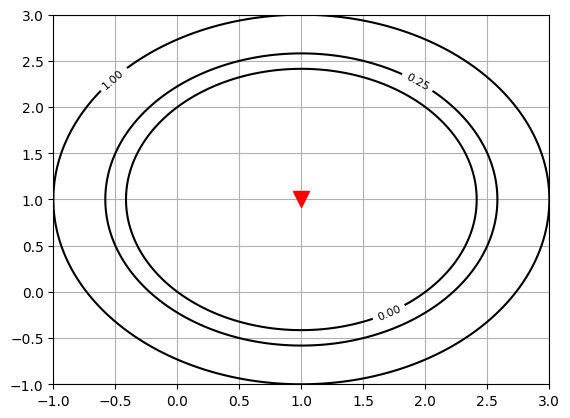

In [4]:
gd = gradient_descent(QO1, [5, 0], tolerance=1e-5, max_iter=10000, trace=True,
                      display=False,
                      line_search_options={'method': 'Constant'})[2]

func = gd['func']
x = gd['x']

plot_levels(QO1.func, xrange=[-1,3], yrange=[-1, 3])
plot_trajectory(func, history=x)

plt.show()


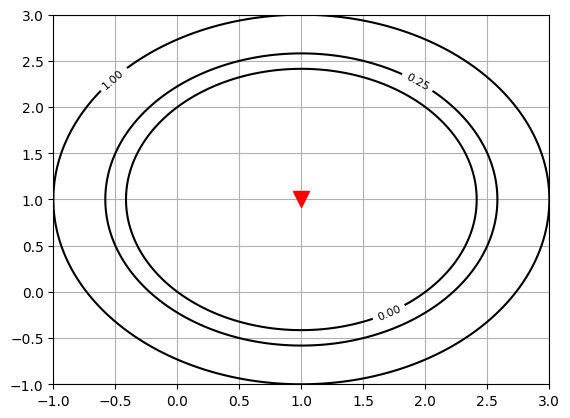

In [5]:
gd = gradient_descent(QO1, [5, 0], tolerance=1e-5, max_iter=10000, trace=True,
                      display=False,
                      line_search_options={'method': 'Wolfe'})[2]

func = gd['func']
x = gd['x']

plot_levels(QO1.func, xrange=[-1,3], yrange=[-1, 3])
plot_trajectory(func, history=x)

plt.show()



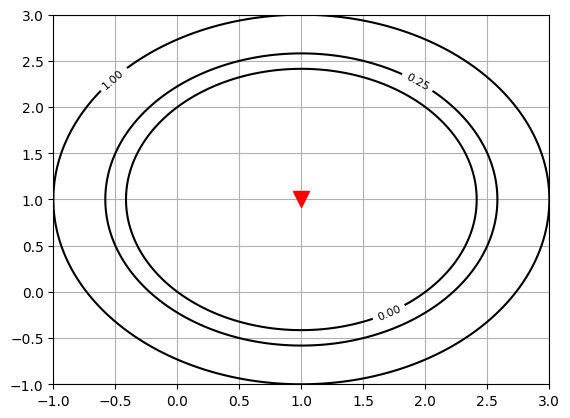

In [6]:
gd = gradient_descent(QO1, [5, 0], tolerance=1e-5, max_iter=10000, trace=True,
                      display=False,
                      line_search_options={'method': 'Armijo'})[2]

func = gd['func']
x = gd['x']

plot_levels(QO1.func, xrange=[-1,3], yrange=[-1, 3])
plot_trajectory(func, history=x)

plt.show()


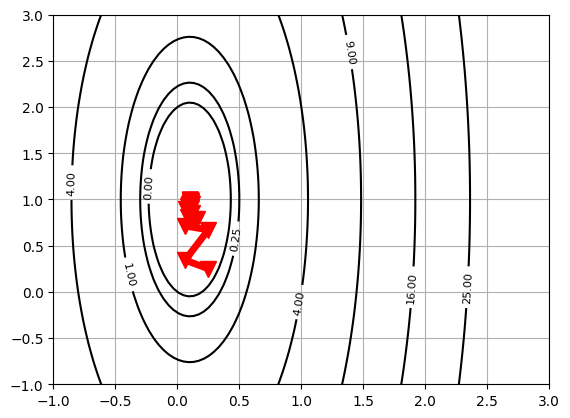

In [7]:
gd = gradient_descent(QO2, [0, 0], tolerance=1e-5, max_iter=10000, trace=True,
                      display=False,
                      line_search_options={'method': 'Armijo'})[2]

func = gd['func']
x = gd['x']

plot_levels(QO2.func, xrange=[-1,3], yrange=[-1, 3])
plot_trajectory(func, history=x)

plt.show()



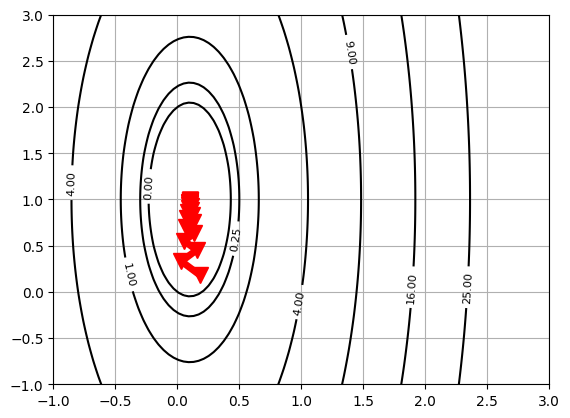

In [8]:
gd = gradient_descent(QO2, [0, 0], tolerance=1e-5, max_iter=10000, trace=True,
                      display=False,
                      line_search_options={'method': 'Wolfe'})[2]

func = gd['func']
x = gd['x']

plot_levels(QO2.func, xrange=[-1,3], yrange=[-1, 3])
plot_trajectory(func, history=x)

plt.show()

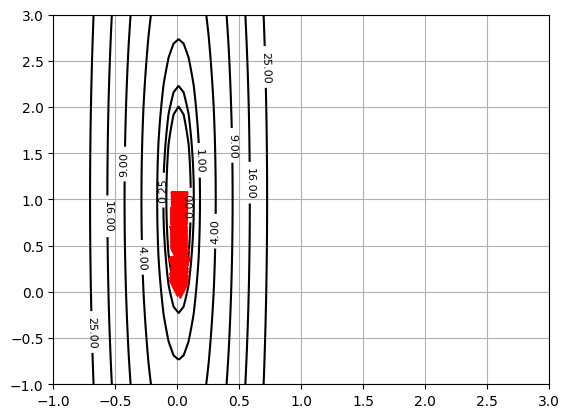

In [9]:
gd = gradient_descent(QO3, [0, 0], tolerance=1e-5, max_iter=10000, trace=True,
                      display=False,
                      line_search_options={'method': 'Wolfe'})[2]

func = gd['func']
x = gd['x']

plot_levels(QO3.func, xrange=[-1,3], yrange=[-1, 3])
plot_trajectory(func, history=x)

plt.show()


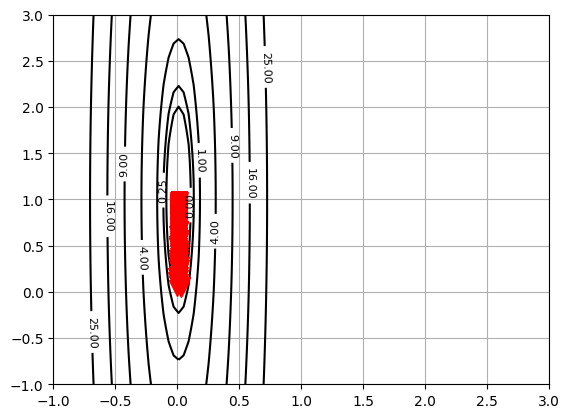

In [10]:
gd = gradient_descent(QO3, [0, 0], tolerance=1e-5, max_iter=10000, trace=True,
                      display=False,
                      line_search_options={'method': 'Armijo'})[2]

func = gd['func']
x = gd['x']

plot_levels(QO3.func, xrange=[-1,3], yrange=[-1, 3])
plot_trajectory(func, history=x)

plt.show()

#3.2 Эксперимент: Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства
#Исследуйте, как зависит число итераций, необходимое градиентному спуску для сходимости, от сле- дующих двух параметров: 1) числа обусловленности
#κ≥1 оптимизируемой функции и 2) размерности пространства n оптимизируемых переменных.

#Для этого для заданных параметровnиκсгенерируйте случайным образом квадратичную задачу размераnс числом обусловленностиκи запустите на ней градиентный спуск с некоторой фиксиро- ванной требуемой точностью. Замерьте число итераций
T
(
n
,
κ
)
#, которое потребовалось сделать методу до сходимости (успешному выходу по критерию остановки).

Рекомендация: Проще всего сгенерировать случайную квадратичную задачу размера
n
 с заданным числом обусловленности
κ
 следующим образом. В качестве матрицы
A
∈
S
n
+
+
 удобно взять просто диагональную матрицу
A
=
D
i
a
g
(
a
)
, у которой диагональные элементы сгенерированы случайно в пределах
[
1
,
κ
]
, причем
m
i
n
(
a
)
=
1
,
m
a
x
(
a
)
=
κ
#В качестве вектора
b
∈
R
n
#можно взять вектор со случайными элементами. Диагональные матрицы удобно рассматривать, поскольку с ними можно эффективно работать даже при больших значениях
n
. Рекомендуется хранить матрицу
A
 в формате разреженной диагональной матрицы (см. scipy.sparse.diags).

Зафиксируйте некоторое значение размерности
n
. Переберите различные числа обусловленности
κ
 по сетке и постройте график зависимости
T
(
κ
,
n
)
 против
κ
. Поскольку каждый раз квадратичная задача генерируется случайным образом, то повторите этот эксперимент несколько раз. В результате для фиксированного значения
n
 у Вас должно получиться целое семейство кривых зависимости
T
(
κ
,
n
)
 от
κ
. Нарисуйте все эти кривые одним и тем же цветом для наглядности (например, красным).

Теперь увеличьте значение
n
 и повторите эксперимент снова. Вы должны получить новое семейство кривых
T
(
n
'
,
κ
)
 против
κ
. Нарисуйте их все одним и тем же цветом, но отличным от предыдущего (например, синим).

Повторите эту процедуру несколько раз для других значений
n
. В итоге должно получиться несколько разных семейств кривых - часть красных (соответствующих одному значению
n
), часть синих (соответствующих другому значению
n
), часть зеленых и т. д.

Обратите внимание, что значения размерности
n
 имеет смысл перебирать по логарифмической сетке (например,
n
=
10
,
n
=
100
,
n
=
1000
 и т. д.).

Какие выводы можно сделать из полученной картинки?

In [11]:
from scipy.sparse import diags

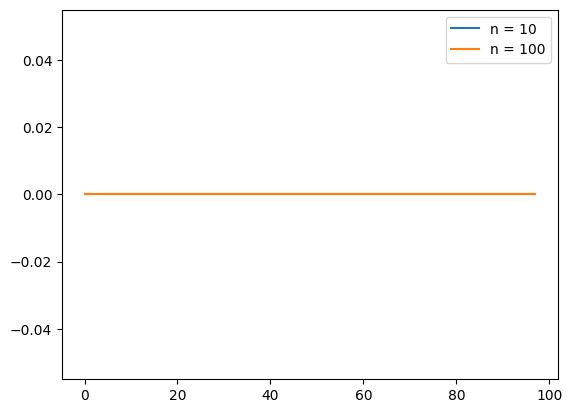

In [12]:
for n in [10, 100]:
  Tnk = []
  for k in range(2, 100):

    eigenvalues = np.random.uniform(1, 1, n)
    eigenvalues[0] = 1
    eigenvalues[-1] = k

    A = diags(eigenvalues, format='csr')

    b = np.random.randn(n)

    QO = QuadraticOracle(A.toarray(), b)
    history = gradient_descent(QO, np.random.randn(n), tolerance=1e-5, max_iter=10000, trace=True,
                      display=False,
                      line_search_options={'method': 'Armijo'})[2]
    T = len(history['x'])
    Tnk.append(T)
  plt.plot(Tnk, label = f'n = {n}')
plt.legend()


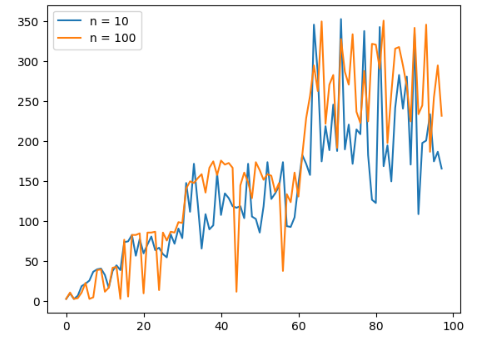

3.3 Эксперимент: Сравнение методов градиентного спуска и Ньютона на реальной задаче логистической регрессии
Сравнить методы градиентного спуска и Ньютона на задаче обучения логистической регрессии на реальных данных.

В качестве реальных данных используйте следующие три набора с сайта LIBSVM http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/. : w8a, gisette и real-sim. Коэффициент регуляризации взять стандартным образом:
λ
=
1
/
m
. Параметры обоих методов взять равными параметрам по умолчанию. Начальную точку выбрать
x
0
=
0
.

Построить графики сходимости следующих двух видов:

Зависимость значения функции от реального времени работы метода.
Зависимость относительного квадрата нормы градиента
∥
∇
f
(
x
k
)
∥
2
2
/
∥
∇
f
(
x
0
)
∥
2
2
 (в логарифмической шкале) против реального времени работы.
При этом оба метода (градиентный спуск и Ньютон) нужно рисовать на одном и том же графике. Укажите в отчете, какова стоимость итерации и сколько памяти требуется каждому из методов в зависимости от параметров
m
 (размер выборки) и
n
 (размерность пространства). При оценке используйте нотацию
O
(
⋅
)
, скрывающую внутри себя абсолютные константы.

Какие выводы можно сделать по результатам этого эксперимента? Какой из методов лучше и в каких ситуациях?

Рекомендация: Любой набор данных с сайта LIBSVM представляет из себя текстовый файл в фор- мате svmlight. Чтобы считать такой текстовый файл, можно использовать функцию load_svmlight_file из модуля sklearn.datasets. Обратите внимание, что эта функция возвращает матрицу в формате scipy.sparse.csr_matrix, поэтому Ваша реализация логистического оракула должна поддерживать такие матрицы.

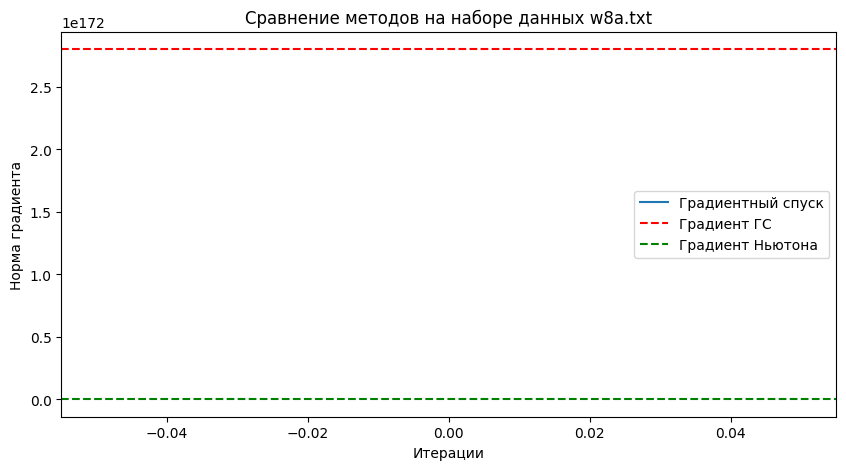

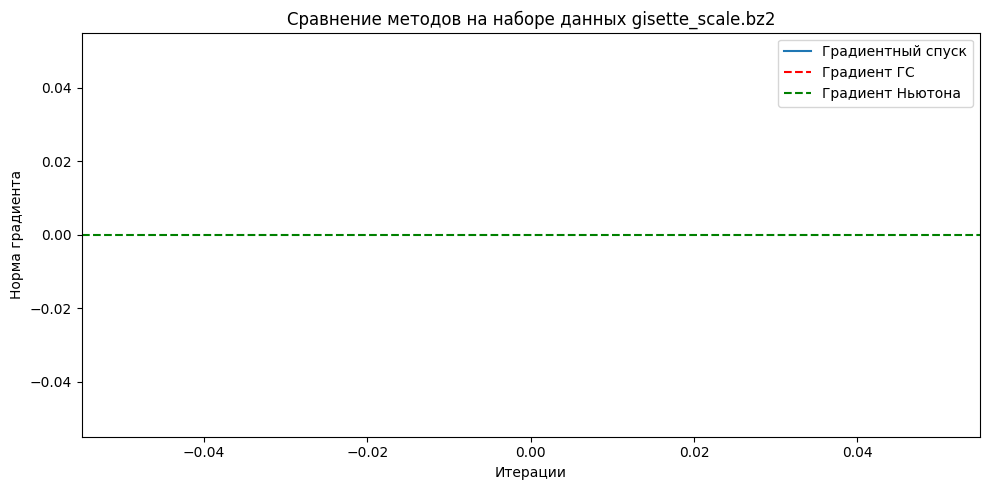

In [13]:
from sklearn.datasets import load_svmlight_file

for file_path in ["w8a.txt", "gisette_scale.bz2"]:
    X, y = load_svmlight_file(file_path)
    X = X.toarray()

    m, n = X.shape
    X = X[:n, :]
    X = np.triu(X) + np.triu(X).T - np.eye(n)
    y = y[:n]
    # Создаем положительно определенную матрицу A и вектор b
    A = np.eye(n)
    A[-1, -1] = 10
    b = np.random.uniform(-10, 10, size=n)

    oracle = QuadraticOracle(X, y)

    # Начальная точка
    x0 = np.zeros(n)

    optimal_x1, status1, history1 = gradient_descent(oracle, x0, max_iter=100,
     trace=True, line_search_options={'method': 'Armijo'})

    optimal_x2, status2, history2 = newton(oracle, x0, max_iter=100,
     trace=True, line_search_options={'method': 'Armijo'})

    # Сравнение градиентов
    grad1 = np.linalg.norm(oracle.grad(optimal_x1))**2
    grad2 = np.linalg.norm(oracle.grad(optimal_x2))**2

    plt.figure(figsize=(10, 5))

    plt.plot([np.linalg.norm(oracle.grad(x)) for x in history1['x']], label='Градиентный спуск')
    plt.axhline(y=grad1, color='r', linestyle='--', label='Градиент ГС')
    plt.axhline(y=grad2, color='g', linestyle='--', label='Градиент Ньютона')

    plt.title(f'Сравнение методов на наборе данных {file_path}')
    plt.xlabel('Итерации')
    plt.ylabel('Норма градиента')
    plt.legend()

plt.tight_layout()
plt.show()